<a href="https://colab.research.google.com/github/MOUNIKADONTULA/Netflix-Movies-and-Tv-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boosts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.


*   There were approximately 7787 records and 12 attributes in the dataset.

*   We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

*   Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

*  The problem of dimensionality was deal with through the use of Principal Component Analysis (PCA).

*  Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

*  The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched..
















### **GitHub Link** -https://github.com/MOUNIKADONTULA/Netflix-Movies-and-Tv-Shows-Clustering.git

#**Index**



1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   Data Cleaning
5.   EDA
6.   Feature engineering
7.   Model Implementation
8.   Recommendation Systems
9.   conclusion




# **1.Problem Statement**

Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# ***Let's Begin !***


## **2. Knowing the Data**

### Importing Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string, unicodedata
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# loading the NETFLIX MOVIES AND TV SHOWS CLUSTERING data set from the drive
netflix_df = pd.read_csv('//content/drive/MyDrive/Netflix Movies and Tv Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Viewing the last 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Counting Rows & Columns of Dataset

In [ ]:
# Dataset Rows & Columns 
netflix_df.shape

(7787, 12)

In [ ]:
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

**How important is it to get rid of duplicate records in my data?**    
The presence of repeated data in the dataset is referred to as "duplication".These could be caused by incorrect data entry or procedures for collecting data.We can save time and money by not sending the same data to the machine learning models multiple times by removing duplicate data from our set.

In [ ]:
# Checking Duplicate Values
value = len(netflix_df[netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate values in our dataset.


###Missing Values/Null values


**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

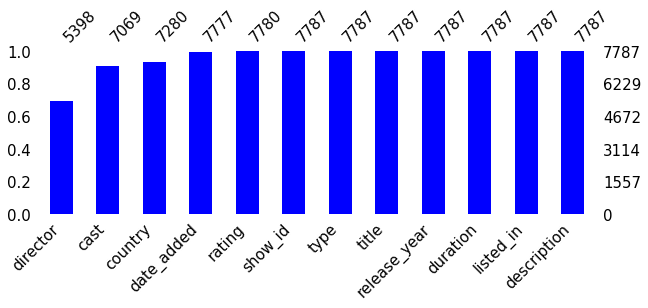

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, color='blue',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

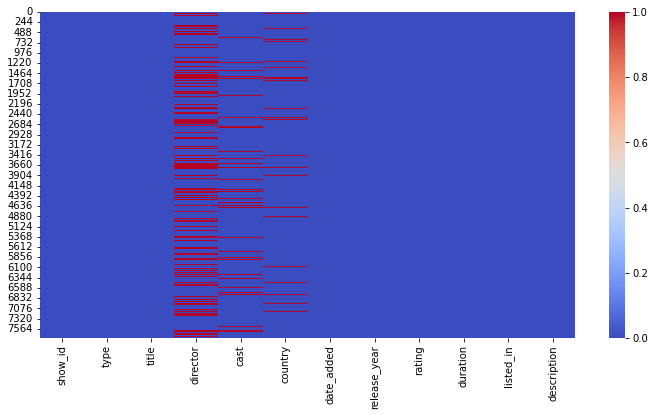

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(netflix_df.isna(), cmap = 'coolwarm')

### What do we know about our dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## **3. Understanding the Variables**

In [ ]:
# Columns of the dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe    (used to get statistics of numerical columns)
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###  Variables Description

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

### Unique Values

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",netflix_df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


In [ ]:
# Top countries
netflix_df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# Genre of shows
netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64



*  There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
*   Also, let's consider only the primary genre of the respective movie / TV show.



In [ ]:
# genre of shows
netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

###Typecasting 'duration' from string to integer

In [ ]:
# Splitting the duration column, and changing the datatype to integer
netflix_df['duration'] =netflix_df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
netflix_df[netflix_df['type']=='TV Show'].duration.value_counts()

1     1608
2      382
3      184
4       87
5       58
6       30
7       19
8       18
9        8
10       6
11       3
13       2
12       2
15       2
16       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
netflix_df[netflix_df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [ ]:
# datatype of duration
netflix_df.duration.dtype
     

dtype('int64')

We have successfully converted the datatype of duration column to int.

###Typecasting 'date_added' from string to datetime:

In [ ]:
# Typecasting 'date_added' from string to datetime
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

In [ ]:
# first and last date on which a show was added on Netflix
netflix_df.date_added.min(),netflix_df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added

netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['year_added'] =netflix_df['date_added'].dt.year
netflix_df.drop('date_added', axis=1, inplace=True)

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

### Observations: 

* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms. 
* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

#**4.Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

In [ ]:
# counting duplicate values
netflix_df.duplicated().sum()

0

**There is no duplicate record in the dataset**

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64


**Handling Missing Values**
*   The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

*  10 records with missing values in the date_added column can be dropped.
*   The missing values in rating can be imputed with its mode, since this attribute is discrete.



In [ ]:
# Handling the missing values
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] =netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

In [ ]:
netflix_df.shape

(7777, 13)

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

**We have successfully handled all the missing values in the dataset.**

### **Handling Outliers**

<Axes: >

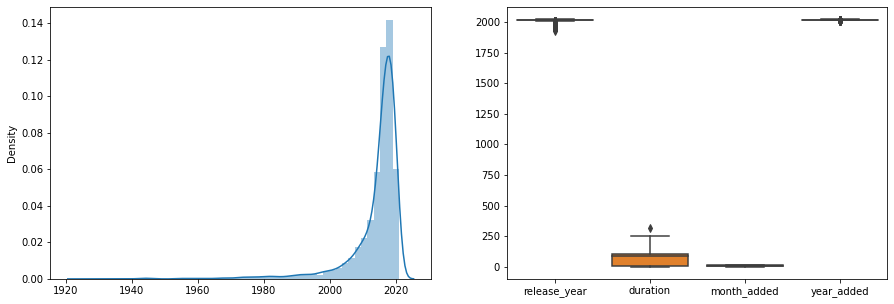

In [ ]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=netflix_df, ax=ax[1])


**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

## **5. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


##**Univatiate Analysis:**

#### **5.1 Column: 'type'**

In [ ]:
# number of values of different categories in 'type'
netflix_df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

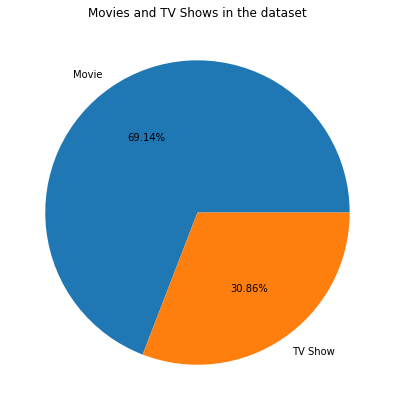

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
netflix_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

 
  **

*  **Movies has more number of counts than TV Shows.**
*  **31% of the data are from TV shows, while 69% of the data are from movies.**



#### **5.2 Column: 'title'**

In [ ]:
# number of unique values
netflix_df['title'].nunique()

7777

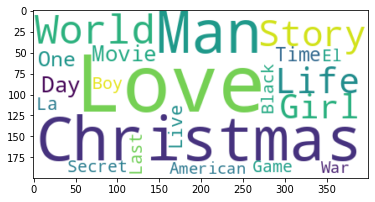

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

 **Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.**

#### **5.3 Column: 'director'**

In [ ]:
print(f'number of unique directors : {netflix_df.director.nunique()}')
print(f'null values in the column : {netflix_df.director.isna().sum()}')

number of unique directors : 4050
null values in the column : 0


Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

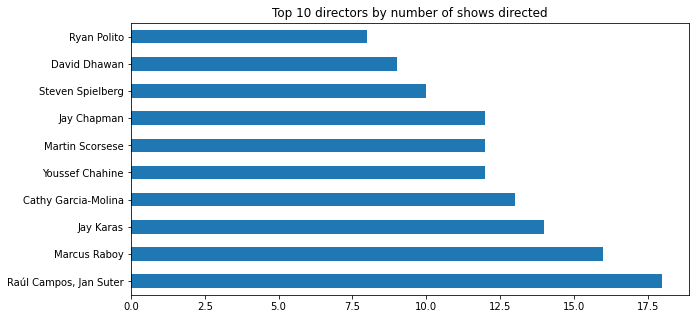

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

**Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

#### **5.4 Column: 'country'**

In [ ]:
# number of unique values
netflix_df['country'].nunique()

682

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

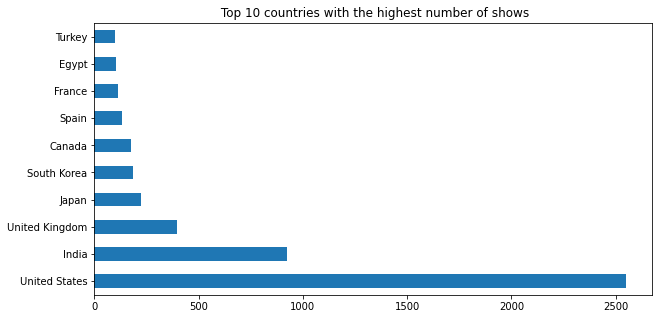

In [ ]:
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

*** The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.**




#### **5.5 Column: 'release_year'**

In [ ]:
# number of unique values
netflix_df['release_year'].nunique()

73

Text(0.5, 1.0, 'distribution by released year')

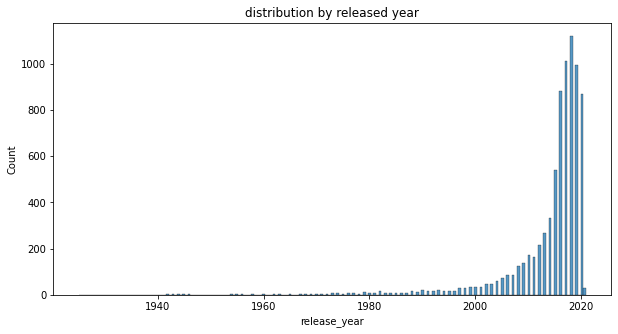

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(netflix_df['release_year'])
plt.title('distribution by released year')
     

**Netflix has greater number of new movies / TV shows than the old ones.**

#### **5.6 Column: ' genres '**

In [ ]:
netflix_df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

**Since this column is a genre column, in order to count the genres, we must separate them.**

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1198
4,Documentaries,786


In [ ]:
# number of genres present in dataset 
len(genres)

42

Text(0.5, 1.0, 'Top 10 genres')

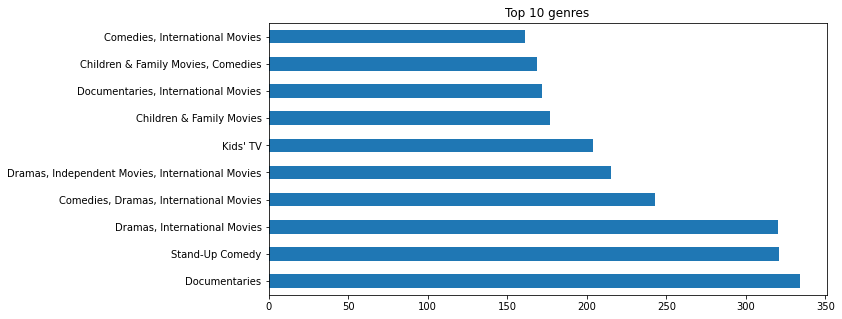

In [ ]:
# Top 10 genres 
plt.figure(figsize=(10,5))
netflix_df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

**The documentaries is the most popular genre followed by comedies and dramas .**

#### **5.7 Column: 'description'**

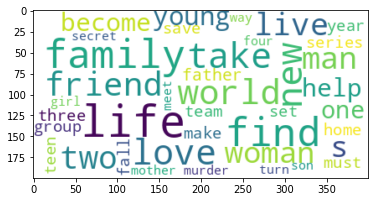

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."**

#### **5.8 Column: 'cast'**

In [ ]:
netflix_df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              Unknown
Name: cast, Length: 7777, dtype: object

Text(0.5, 1.0, 'top actors name who play highest role in movie/show.')

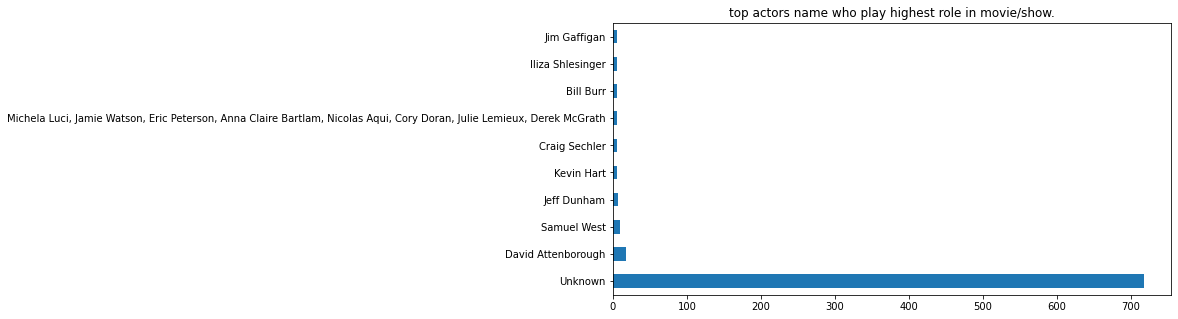

In [ ]:
plt.figure(figsize=(10,5))
netflix_df.cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('top actors name who play highest role in movie/show.')

## **Bivariate analysis:**

###**5.1 Movie and tv shows**

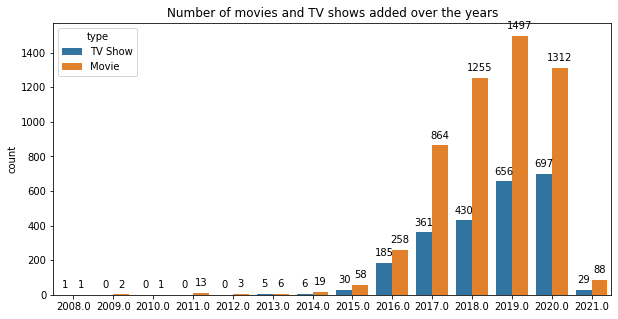

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 

###**5.2 Number of shows released**

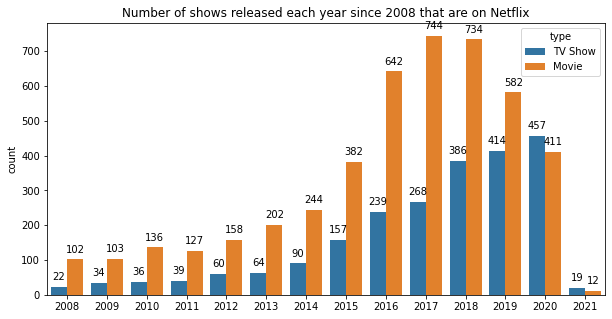

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=netflix_df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* **Over the years, Netflix has consistently focused on adding more shows in its platform.**
* **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**
* **This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

###**5.3 Seasons in tv shows**

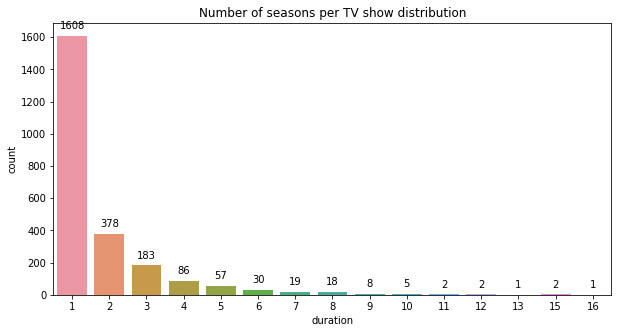

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=netflix_df[netflix_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# % of tv shows with just 1 season
len(netflix_df[(netflix_df['type']=='TV Show') & (netflix_df['duration']==1)]) / len(netflix_df[netflix_df['type']=='TV Show'])* 100

67.0

* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

###**5.4 Length of movie**

Text(0.5, 1.0, 'Movie duration distribution')

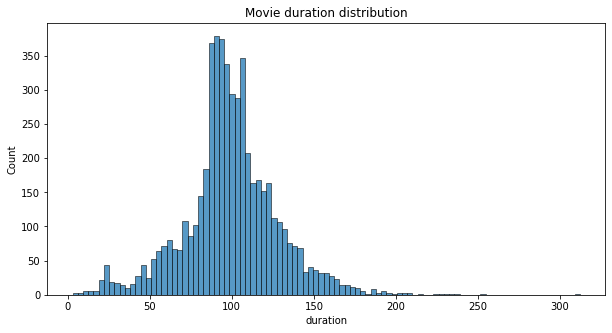

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=netflix_df[netflix_df['type']=='Movie'])
plt.title('Movie duration distribution')

In [ ]:
# Movie statistics
netflix_df[netflix_df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* **The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.**

###**Average movie length**

Text(0.5, 0, 'Year')

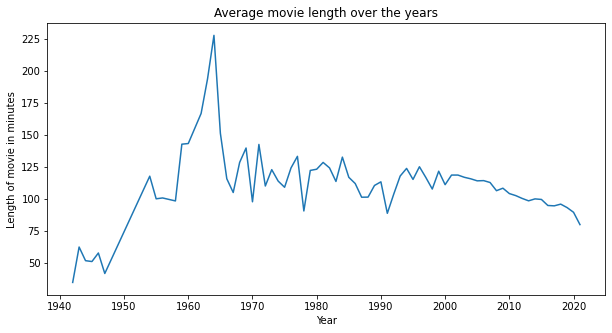

In [ ]:
# Average movie length over the years
plt.figure(figsize=(10,5))
netflix_df[netflix_df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [ ]:
# Movie release year statistics
netflix_df[netflix_df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

* **Netflix has several movies on its site, including those that were released in way back 1942.**
* **As per the plot, movies made in the 1940s had a fairly short duration on average.**
* **On average, movies made in the 1960s have the longest movie length.**
* **The average length of a movie has been continuously decreasing since the 2000s.**

###**5.5 Top 10 genre for movies/tv shows**

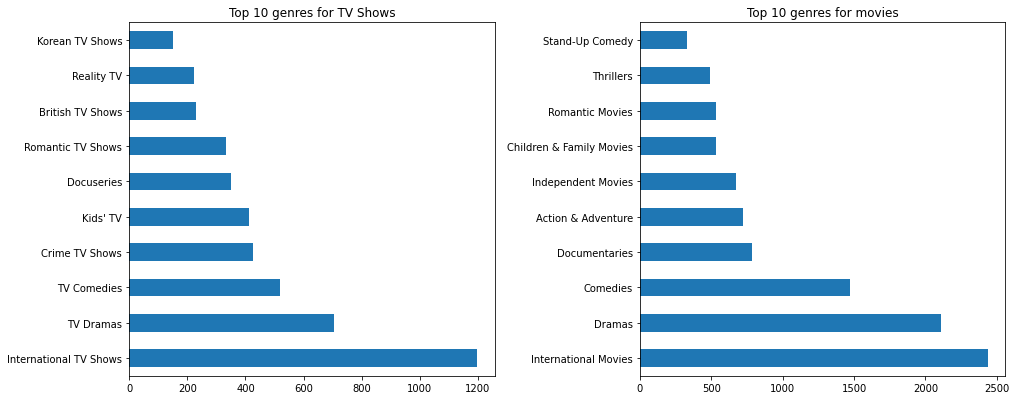

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
top_movie = netflix_df[netflix_df['type']=='Movie']['listed_in'].str.split(', ', expand=True).stack()
a = top_movie.value_counts().head(10).plot(kind='barh', ax=ax[1])
a.set_title('Top 10 genres for movies')
top_TVshows = netflix_df[netflix_df['type']=='TV Show']['listed_in'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
b= top_TVshows.value_counts().head(10).plot(kind='barh', ax=ax[0])
b.set_title('Top 10 genres for TV Shows')
plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

*   **International, crime, and kids are the most popular genre for TV shows on Netflix.**
*   **Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.**



###**5.6 Top  movie/tv shows director**

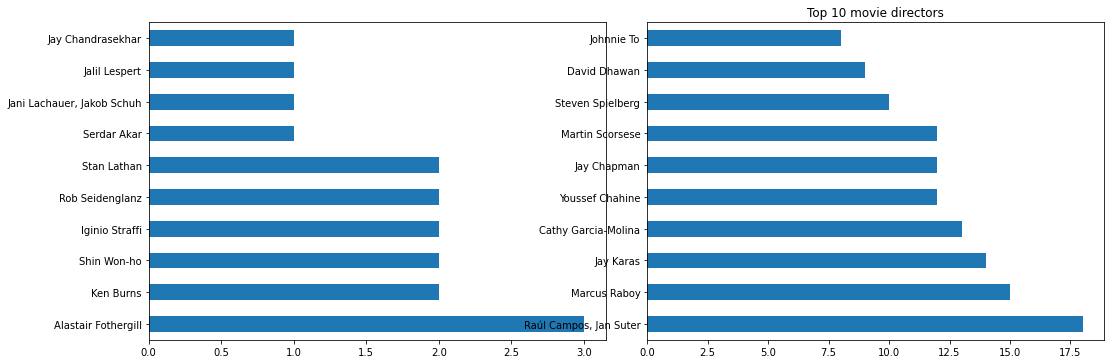

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
plt.tight_layout()
# top 10 directors who directed TV shows
netflix_df[~(netflix_df['director']=='Unknown') & (netflix_df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh', ax=ax[0])
plt.title('Top 10 tv show directors')
# top 10 directors who directed Movies
netflix_df[~(netflix_df['director']=='Unknown') & (netflix_df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh', ax=ax[1])
plt.title('Top 10 movie directors')


plt.show()

*   **Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.**
*   **This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina**

*   **Alastair Fothergill has directed three TV shows, the most of any director.**
*   **Only six directors have directed more than one television show.**





###**5.7 Country and Rating**

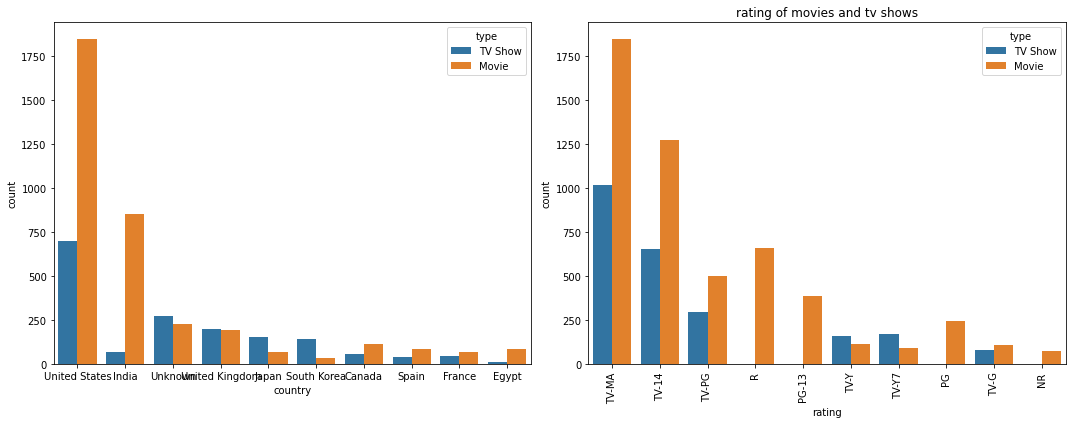

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
graph_0= sns.countplot(x="country", data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10], ax=ax[0])
plt.xticks(rotation=90)
plt.title('top countries movies/tv shows')
graph_1 = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
plt.title('rating of movies and tv shows')
plt.tight_layout()
plt.show()




*   **The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.**
*   **In the UK, Japan, and South Korea there are a greater number of TV shows than movies.**

*  **The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."**
*  **When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.
**





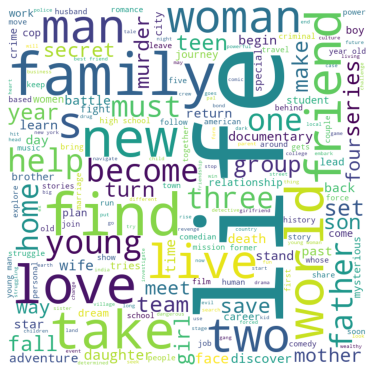

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in netflix_df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.**

## **6.Textual Data Preprocessing**

#### **What is textual data preprocessing?**
* Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

#### **Modeling Approach**
1.   Choose the attributes that you want to cluster. 
2.   Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
4.   Tokenization: Breaking the text into smaller units, such as sentences or words.
5.   Dimensionality reduction.
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

### **6.1 Selecting Attributes**

In [ ]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,2018.0


We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [ ]:
# creating tags column using all text column which one is used for model building purpose.
netflix_df['text_data'] = netflix_df['director'] + netflix_df['cast'] + netflix_df['country'] + \
                     netflix_df['rating'] + netflix_df['listed_in'] + netflix_df['description']
     

In [ ]:
# checking the first row
netflix_df['text_data'][0]

'UnknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* **We were able to successfully consolidate all of the required data into a single column.**

### **6.2. Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
netflix_df['text_data'] = remove_non_ascii(netflix_df['text_data'])

In [ ]:
netflix_df['text_data'][40]

'Muharrem GulmezErdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz OzermanTurkeyTV-14Comedies, International MoviesThe slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* **We have successfully removed all non-ascii characters from the corpus.**

### **6.3 Removing Stop words and Lower Casing.**

In natural language processing (NLP) tasks, removing stop words and lowercasing words are common pre-processing steps. 
* **Stop words Removal:**  Words such as "a," "an," "the," and "is," are words that are commonly used in a language but do not convey much meaning. These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step. 

* **Lowercasing:** It is the process of converting all the words in a text to lowercase. This can be useful in tasks such as information retrieval or text classification where case differences are not important and also can reduce the size of the vocabulary making it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [ ]:
# create a set of English stop words
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying stopwords function.
netflix_df['text_data'] = netflix_df['text_data'].apply(stopwords)

In [ ]:
# checking the first row again
netflix_df['text_data'][0]

'unknownjoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

* **We have successfully changed the corpus to lowercase and removed all stopwords.**

### **6.4 Removing Punctuations**

Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis, as punctuation marks often do not carry much meaning and can add noise to the data. Removing punctuation can also make it easier to tokenize text into words or sentences, as punctuation marks often act as delimiters between words or sentences. Additionally, removing punctuation can also help in reducing the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms. It can be done using python libraries such as string, re, and nltk.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying remove_punctuation function
netflix_df['text_data'] = netflix_df['text_data'].apply(remove_punctuation)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'unknownjoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

* **We have effectively eliminate all the punctuation marks from the corpus.**

### **6.5 Stemming**

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

* We will utilize **SnowballStemmer** to construct a meaningful word from a word corpus.

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
netflix_df['text_data'] = netflix_df['text_data'].apply(stemming)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'unknownjoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

* **We have successfully utilized the stemming process.**

### **6.6 Text Vectorization**

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.
\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(netflix_df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(netflix_df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')
     

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


### **6.7 Dimensionality Reduction**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

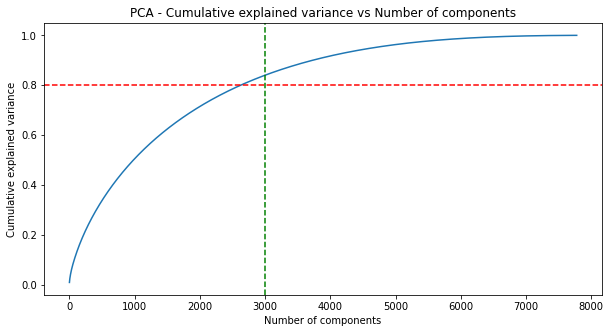

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* **We discover that approximately 7500 components account for 100 percent of the variance.**
* **3000 components alone account for more than 80% of the variance.**
* **Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.**

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7777, 3000)

## **7. Model Implementation**

### **7.1 K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

* We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

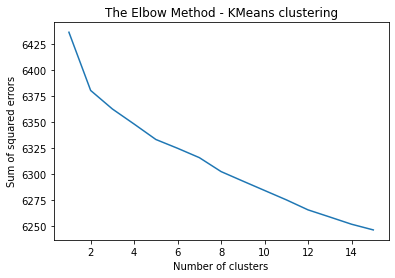

In [ ]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

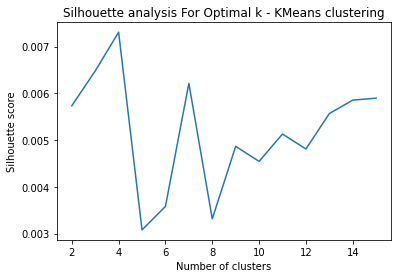

In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* **The highest Silhouette score is obtained for 4 clusters.**
* **Building 4 clusters using the k-means clustering algorithm.**

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6346.843116214752, 0.002553655863340804)


In [ ]:
# Adding a kmeans cluster number attribute
netflix_df['kmeans_cluster'] = kmeans.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
4217,TV Show,Monty Python's Flying Circus,Unknown,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,TV-14,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...,1
55,Movie,100 Things to do Before High School,Unknown,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,TV-Y,Movies,"Led by seventh-grader C.J., three students who...",2
2764,TV Show,Hoff the Record,Gordon Anderson,"David Hasselhoff, Asim Chaudhry, Fergus Craig,...",United Kingdom,TV-MA,"British TV Shows, TV Comedies",TV star David Hasselhoff hopes to reboot his c...,1
4319,Movie,My Fuhrer,Dani Levy,"Helge Schneider, Ulrich Mühe, Sylvester Groth,...",Germany,TV-14,"Comedies, International Movies",Germany's most celebrated actor is commissione...,2
3695,Movie,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran, Ja...",United Kingdom,R,"Action & Adventure, Comedies, Independent Movies",Hoping to make a bundle in a high-stakes poker...,2


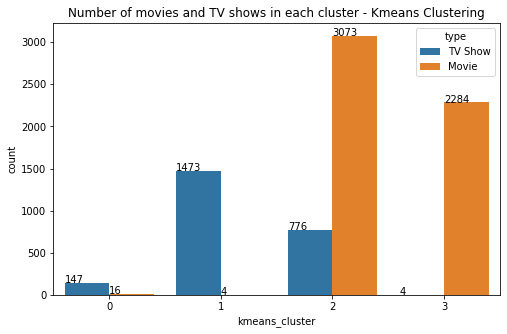

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* **Successfully built 4  clusters using the k-means clustering algorithm.**

#### **Building wordclouds for different clusters in K-Means Clustering**

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix_df[netflix_df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

**Word Cloud for cluster - 1**

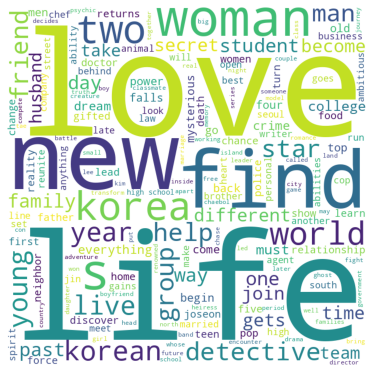

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: find,life, new, family, friend, woman, help, world, korean, year**

**Word Cloud for cluster - 2**

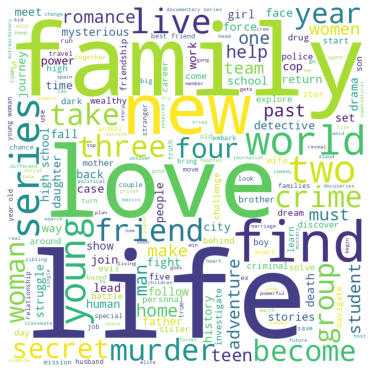

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, new, find,series, man, woman, friend, become**

**Word Cloud for cluster - 3**

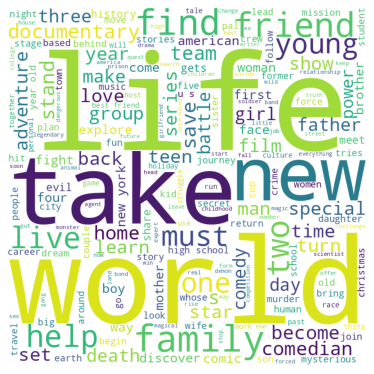

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: life, world,take, family, friend, new, find, young, help, must, death**

**Word Cloud for cluster - 4**

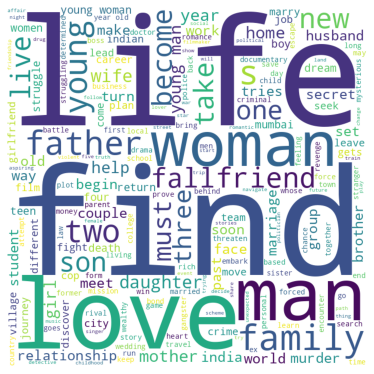

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: love, life, family,man,find, father, friend, become,friend,young.**

### **7.2 Hierarchical clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

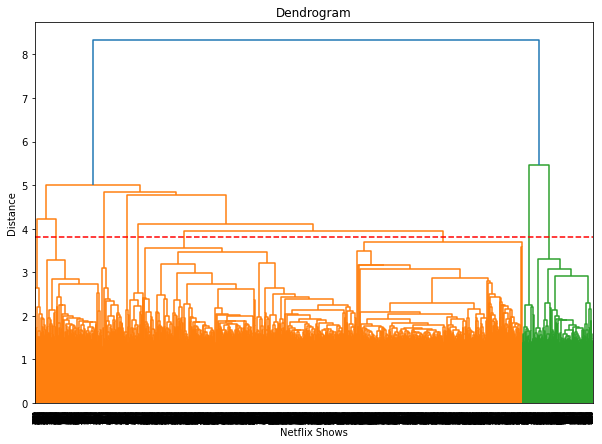

In [ ]:
# Building a dendogram to decide the number of clusters
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 9 clusters can be built using the agglomerative clustering algorithm.**

Building 9 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([3, 1, 1, ..., 1, 1, 1])

In [ ]:
# Adding a hierarchical cluster number attribute
netflix_df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
6118,Movie,The Beach Loafer,Ali Ragab,"Ahmed Helmy, Yasmin Abdulaziz, Mahmoud Abdel M...",Egypt,TV-14,"Comedies, International Movies",A wedding singer and his friends try to prove ...,2
410,Movie,All Good Ones Get Away,Víctor García,"Claire Forlani, Jake Abel, Titus Welliver, Mel...","Spain, Italy",TV-MA,"International Movies, Thrillers",When a mysterious figure blackmails an adulter...,1
5572,TV Show,Shooter,Unknown,"Ryan Phillippe, Omar Epps, David Marciano, Cyn...",United States,TV-14,"Crime TV Shows, TV Action & Adventure, TV Dramas",A highly decorated ex-Marine sniper returns to...,3
7405,Movie,Veronica,Paco Plaza,"Sandra Escacena, Claudia Placer, Bruna Gonzále...",Spain,TV-MA,"Horror Movies, International Movies, Thrillers","In 1991 Madrid, after holding a séance at scho...",3
988,TV Show,Blood of Zeus,Unknown,"Derek Phillips, Jason O'Mara, Claudia Christia...",United States,TV-MA,Anime Series,"A commoner living in ancient Greece, Heron dis...",0


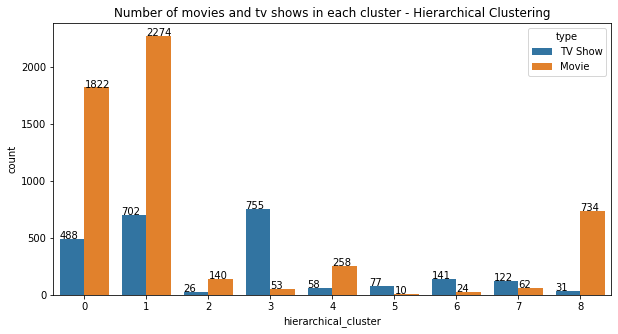

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix_df[netflix_df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

**Word Cloud for cluster - 1**

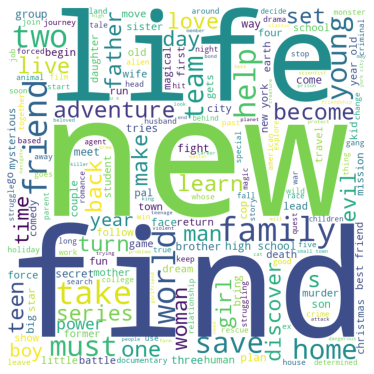

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in cluster 0:new,find,life,family,world,friend,save,help**

**Word Cloud for cluster - 2**

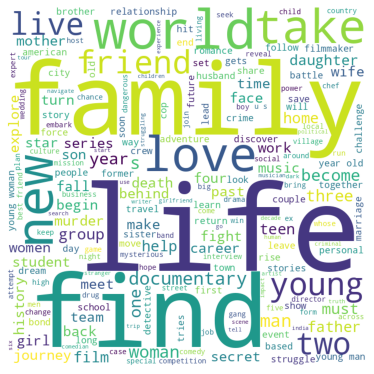

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in cluster 1:life,find,family,take,love,new,live**

**Word Cloud for cluster - 3**

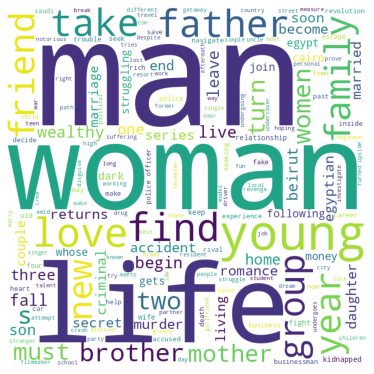

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in cluster 2:woman,man,life,young,father,find,friend,group,year,take**

**Word Cloud for cluster - 4**

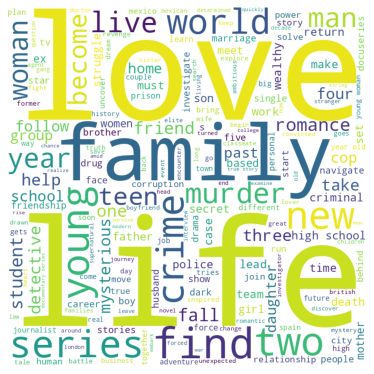

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in cluster 3:love,life,family,murder,series,find,young,crimeworld,new**

**Word Cloud for cluster - 5**

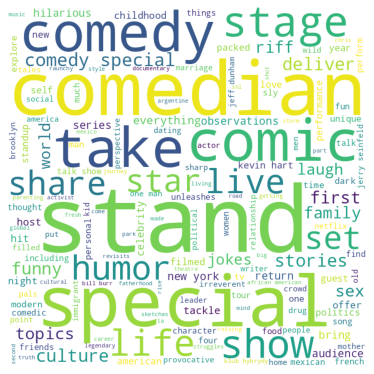

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in cluster 4:stand,special,comedian,comic,stage,show,take,share,humor,life**

**Word Cloud for cluster - 6**

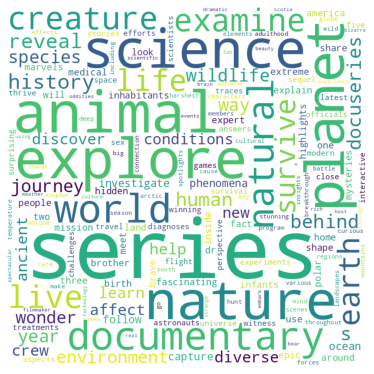

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in cluster 5:series,nature,animal,planet,science,explore,world,documentary,live**

**Word Cloud for cluster - 7**

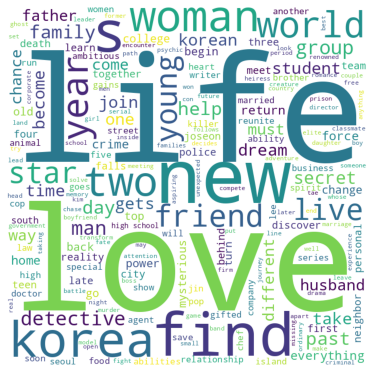

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6:life,love,new,korea,find,woman,world,year,star**

**Word Cloud for cluster - 8**

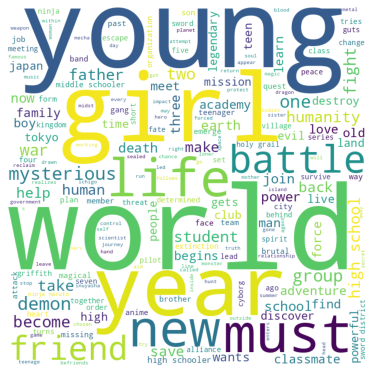

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Keywords observed in cluster 7:world,young,girl,life,year,battle,new,friend,demon,mysterious**

**Word Cloud for cluster - 9**

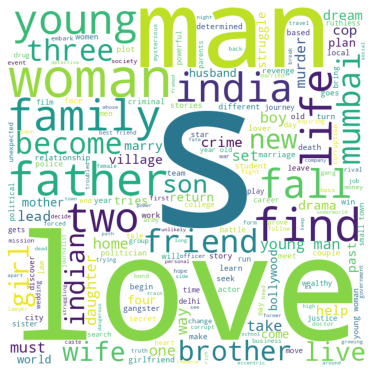

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**Keywords observed in cluster 8:love,man,woman,s,father,find,india,young,family,wife,brother,indian**

## **8. Recommendation System**

A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

* Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
* The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

\begin{align}
        Cos(\theta) = \frac{A\ .\ B}{|A|\ .\ |B|}
    \end{align}

In [ ]:
# veryfying index
netflix_df[['show_id', 'title', 'text_data']]

,show_id,title,text_data
0,s1,3%,unknownjoao miguel bianca comparato michel gom...
1,s2,7:19,jorg michel graudemian bichir hector bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7782,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7783,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7784,s7785,Zulu Man in Japan,unknownnasti cunknowntvmadocumentari intern mo...
7785,s7786,Zumbo's Just Desserts,unknownadriano zumbo rachel khooaustraliatvpgi...


* Our dataframe has a total of 7777 rows, as shown above, and the last index is 7786 due to the deletion of some rows while treating null values.

* In order to construct a content-based recommendation system, we determine the similarity score based on a specific index_id for that particular "tags" column.

* If we are unable to reset the index, there is a good chance that instead of providing an index, we will calculate cosine similarity for another index. in order to avoid this issue and properly address index when developing the recommendation system. The index was simply reset.

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = netflix_df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'text_data']]
     

,show_id,title,text_data
0,s1,3%,unknownjoao miguel bianca comparato michel gom...
1,s2,7:19,jorg michel graudemian bichir hector bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7772,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7773,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7774,s7785,Zulu Man in Japan,unknownnasti cunknowntvmadocumentari intern mo...
7775,s7786,Zumbo's Just Desserts,unknownadriano zumbo rachel khooaustraliatvpgi...


* As shown in the dataframe above, the index was successfully reset. The dataset can now be used to construct a content-based recommendation system.

In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 0.1643229 , -0.01206264, -0.01226801, ..., -0.02157763,
         0.00456315,  0.0092341 ],
       [-0.04226642,  0.01394099,  0.01743292, ...,  0.00316458,
         0.00616007,  0.00311211],
       [-0.04432025,  0.02453598, -0.05271385, ...,  0.00735968,
        -0.00238459,  0.00070601],
       ...,
       [-0.07168514,  0.01489261,  0.10886611, ..., -0.0010669 ,
         0.00105361,  0.0049774 ],
       [ 0.06834582, -0.03483796,  0.04279242, ...,  0.00457252,
        -0.00340826, -0.00303663],
       [-0.06968022, -0.08181172,  0.11020725, ...,  0.00844367,
        -0.00125126, -0.00635375]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.07929834,  0.01929284, ..., -0.01962396,
         0.01163494, -0.01580169],
       [ 0.07929834,  1.        , -0.00650814, ...,  0.07194855,
        -0.00883529, -0.0080183 ],
       [ 0.01929284, -0.00650814,  1.        , ..., -0.00188873,
        -0.01319913, -0.01478467],
       ...,
       [-0.01962396,  0.07194855, -0.00188873, ...,  1.        ,
        -0.00732766,  0.14686249],
       [ 0.01163494, -0.00883529, -0.01319913, ..., -0.00732766,
         1.        ,  0.04680927],
       [-0.01580169, -0.0080183 , -0.01478467, ...,  0.14686249,
         0.04680927,  1.        ]])

In [ ]:
similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(netflix_df.iloc[i[0]].title)

In [ ]:
# Recommendations for 'Stranger Things'
recommend('Stranger Things')

If you liked 'Stranger Things', you may also enjoy: 

Beyond Stranger Things
Sleepless Society: Nyctophobia
Reckoning
The OA
Kiss Me First
American Odyssey
Anjaan: Special Crimes Unit
The 4400
The Umbrella Academy
Good Witch


In [ ]:
# Recommendations for 'A Man Called God'
recommend('A Man Called God')

If you liked 'A Man Called God', you may also enjoy: 

Illang: The Wolf Brigade
Mr. Sunshine
The Sound of Your Heart
Tune in for Love
The King: Eternal Monarch
Hospital Playlist
Second 20s
Can We Get Married?
Abyss
Inheritors


In [ ]:
# Recommendations for 'Golmaal: Fun Unlimited'
recommend('Golmaal: Fun Unlimited')

If you liked 'Golmaal: Fun Unlimited', you may also enjoy: 

Golmaal Returns
Maine Pyaar Kyun Kiya
Hattrick
Phir Hera Pheri
Ishqiya
C Kkompany
Himmatwala
Haseena Maan Jaayegi
Saheb Bibi Golaam
Bhool Bhulaiyaa


In [ ]:
#Recommendations for 'Breaking Bad'
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
Hormones
Servant of the People
The Underclass
W/ Bob & David
The School Nurse Files
Time Share
21 Thunder
The Bad Kids
Lovesick


In [ ]:
# Recommendations for 'Lucifer'
recommend('Lucifer')

If you liked 'Lucifer', you may also enjoy: 

The Lizzie Borden Chronicles
The Good Cop
Rica, Famosa, Latina
Cold Case Files
Monty Python's Fliegender Zirkus
The Spectacular Now
L.A.’s Finest
On My Block
Marvel's Jessica Jones
Behzat Ç.


## **9. Conclusion**

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* The dataset contained about 7787 records, and 12 attributes.
* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through TFIDF Vectorization, we created a total of 10000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be  4. This was obtained through the elbow method and Silhouette score analysis. 
* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 9. This was obtained after visualizing the dendrogram.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **10. References:**

* GeekforGeeks
* Towards data science
* Analytics Vidhya
* Kaggle
* W3 school
* Stackoverflow
* Python libraries technical documentation
* Krish Naik on Youtube
* Codebasics on Youtube